In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import netCDF4 as nc

In [136]:
'''
longitude 是纬度，共有 360* 4 = 1440 个点, 
latitude 是经度，共有 180*2 + 1 = 361 个点,
time 时间是从1982年1月开始
sst 是361 * 1440 的矩阵
'''
file = './SST.nc'
dataset = nc.Dataset(file)
# print(dataset.variables.keys())

longitude, latitude = dataset.variables['longitude'],dataset.variables['latitude']
time = dataset.variables['time']
sst =dataset.variables['sst']


In [137]:
sum_month = np.zeros(sst[:1].data.shape, dtype=float, order='C') # 创建空矩阵

num_month = time[:].data.shape[0] # 创建空时间矩阵

num_month_1997to1982 = (1998 - 1982) * 12 #计算1982年1月到1997年12月的月数

num_month_2021to1998 = (2022 - 1998) * 12 #计算1998年1月到2021年12月的月数


In [138]:

sum_month_1982to1997 = sum_month
# 求和：1982年1月到1997年12月的sst矩阵
for i in range(0, num_month_1997to1982+1): 
    temp_pre = sst[i:i+1].data
    sum_month_1982to1997 += temp_pre
# 求平均
mean_1982to1997 = sum_month_1982to1997 / num_month_1997to1982

mean_1982to1997 = np.where(mean_1982to1997 > 0, mean_1982to1997, 0) # 如果是负数则定义为0

In [133]:
# ls = mean_1982to1997[0][:1,:][0].tolist()

# def nagetive_test(ls):
#     for i in ls:
#         if i < 0 and i != -32937.661458333336:
#             return i

# for i in range(1, 362):
#     ls = mean_1998to2021[0][:i,:][0].tolist()
#     nagetive_test(ls)

In [139]:
sum_month_1998to2021 = sum_month
# # 求和：1998年1月到2021年12月的sst矩阵
for i in range(num_month_1997to1982, num_month_2021to1998+1):
    temp_pre = sst[i:i+1].data
    sum_month_1998to2021 += temp_pre
# 求平均
mean_1998to2021 = sum_month_1998to2021 / num_month_2021to1998

mean_1998to2021 = np.where(mean_1998to2021 > 0, mean_1998to2021, 0) # 如果是负数则定义为0
# 两个阶段的插值
diff = mean_1998to2021 - mean_1982to1997

In [142]:
ls = diff[0][:1,:][0].tolist()

for i in ls:
    if i < 0:
        print(i)

In [144]:
a, b = np.hsplit(diff[0], [720])

diff_pacific_contre = np.concatenate([b, a], axis=1) # 转换为以太平洋为中心的数据

In [162]:
# 定义数据
# data = diff_pacific_contre
data = diff_pacific_contre - 0.6
# data = np.where(diff_pacific_contre > 0, diff_pacific_contre, -0.6)
lat  = latitude[:].data
lon  = longitude[:].data

In [159]:
c, d = np.hsplit(lon, [720])

lon_pacific_contre = np.concatenate([d, c+360]) # 转换为以太平洋为中心的数据

In [148]:
data

array([[[ -0.6       ,  -0.6       ,  -0.6       , ...,  -0.6       ,
          -0.6       ,  -0.6       ],
        [ -0.6       ,  -0.6       ,  -0.6       , ...,  -0.6       ,
          -0.6       ,  -0.6       ],
        [ -0.6       ,  -0.6       ,  -0.6       , ...,  -0.6       ,
          -0.6       ,  -0.6       ],
        ...,
        [286.35814405, 286.46465133, 286.54945162, ..., 286.07220113,
         286.13857789, 286.24612656],
        [286.1986297 , 286.28782836, 286.33967458, ..., 286.0462428 ,
         286.07799007, 286.11506071],
        [286.09777353, 286.13745686, 286.18913156, ..., 286.03208899,
         286.0172154 , 286.05417578]]])

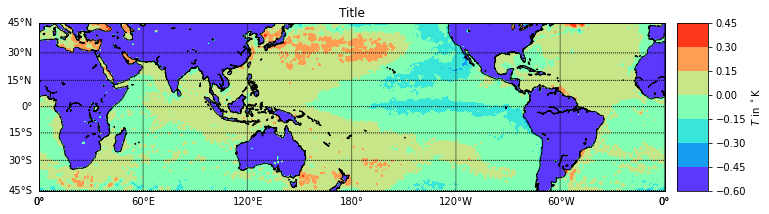

In [164]:
# 新建图
fig1, ax1 = plt.subplots(1,1, figsize=(12,8) )
# 地图坐标
map1 = Basemap( projection='mill', resolution='l',\
               llcrnrlon=0.,urcrnrlon=360.1,\
               llcrnrlat=-45.0,urcrnrlat=45. )
# 大陆线
map1.drawcoastlines()
map1.drawmapboundary( fill_color='white' )
# 定义坐标
map1.drawparallels( np.arange(-45.,46.,15.), labels=[1,0,0,0] )
map1.drawmeridians( np.arange(-180.,180.,60.), labels=[0,0,0,1] )
# 坐标值
x, y = map1(*np.meshgrid(lon_pacific_contre,lat))

# 定义颜色
CS1 = map1.contourf( x, y, data, 
                     cmap=plt.get_cmap('rainbow')
                   )
# 颜色标签
cbar1 = map1.colorbar( CS1, location='right' )
cbar1.set_label( r'$T$ in $^\circ$K')

plt.title("Title")
plt.savefig("sst_diff.png",dpi=300)

plt.show()


In [143]:
sst

<class 'netCDF4._netCDF4.Variable'>
int16 sst(time, latitude, longitude)
    scale_factor: 0.0005880826203496711
    add_offset: 290.41169326337734
    _FillValue: -32767
    missing_value: -32767
    units: K
    long_name: Sea surface temperature
unlimited dimensions: 
current shape = (480, 361, 1440)
filling on

In [71]:
diff_pacific_contre[:1,:720]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.58692897,
        0.59008685, 0.59756346, 0.61161823, 0.61062277, 0.61353971,
        0.61386744, 0.60750165, 0.58735676, 0.5711753 , 0.56326987,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  